In [1]:
%matplotlib inline

In [2]:
import geopandas as gpd
print(gpd.__version__)

0.5.0


# Shapefile

Leer

In [3]:
argentina_radios_censales = gpd.read_file('saved/argentina-radios-censales.shp')

Dibujar

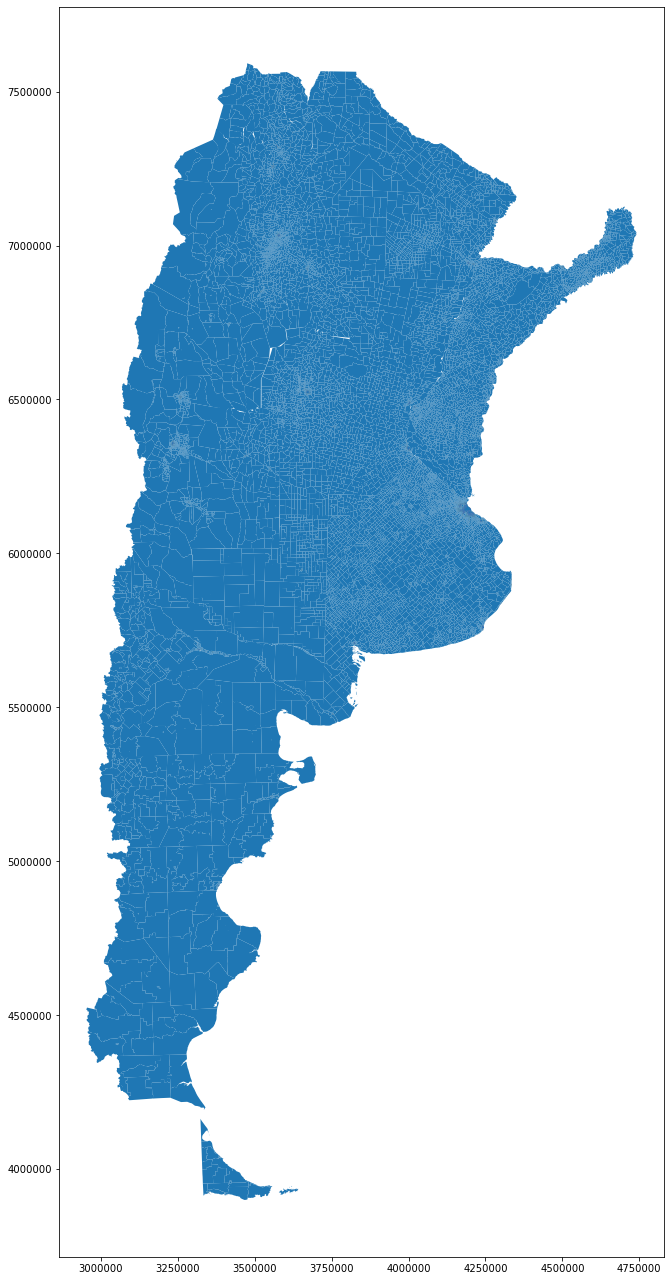

In [4]:
figsize=(15, 23)
argentina_radios_censales.plot(figsize= figsize)

Filtrar Chubut:

Aprovechamos que la columna link contiene códigos estandarizados.

El código de Chubut es '26'.

Filtramos:

In [5]:
chubut = argentina_radios_censales[ argentina_radios_censales.link.str[:2] == '26']
chubut.head()

,hogares,link,mujer,toponimo_i,totalpobl,varon,viv_part_h,viviendasp,geometry
25176,29.0,260070101,16.0,335382.0,75.0,59.0,18.0,29.0,"POLYGON ((3502187.207798843 5349918.686925685,..."
25177,42.0,260070201,36.0,288448.0,127.0,91.0,40.0,65.0,"POLYGON ((3657086.269928162 5328259.005848323,..."
25178,156.0,260070202,257.0,321969.0,565.0,308.0,150.0,153.0,"POLYGON ((3637442.148559475 5289040.661195506,..."
25179,56.0,260070301,23.0,289844.0,106.0,83.0,23.0,36.0,"POLYGON ((3596818.15490842 5306722.879414307, ..."
25180,11.0,260070302,1.0,289845.0,15.0,14.0,11.0,21.0,"POLYGON ((3562683.312617279 5305639.388757056,..."


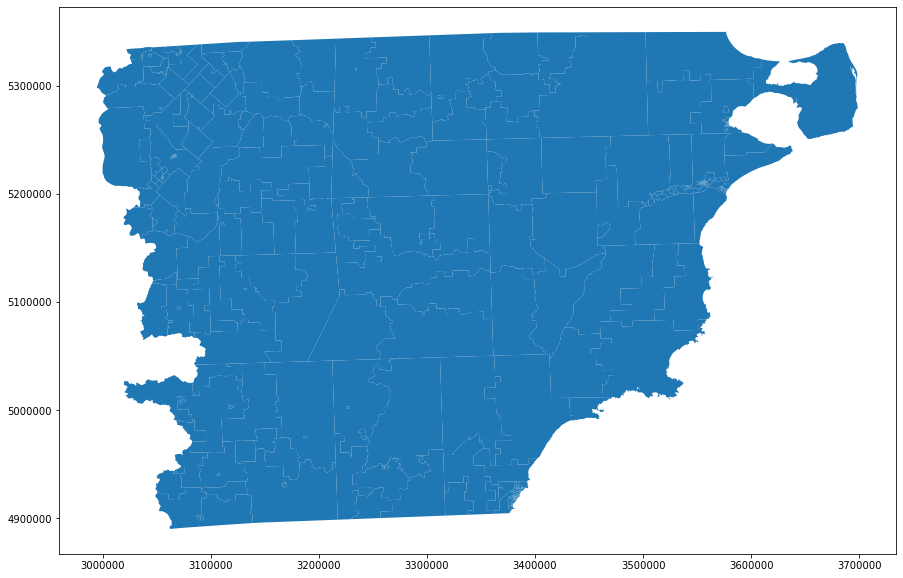

In [6]:
chubut.plot(figsize=figsize)

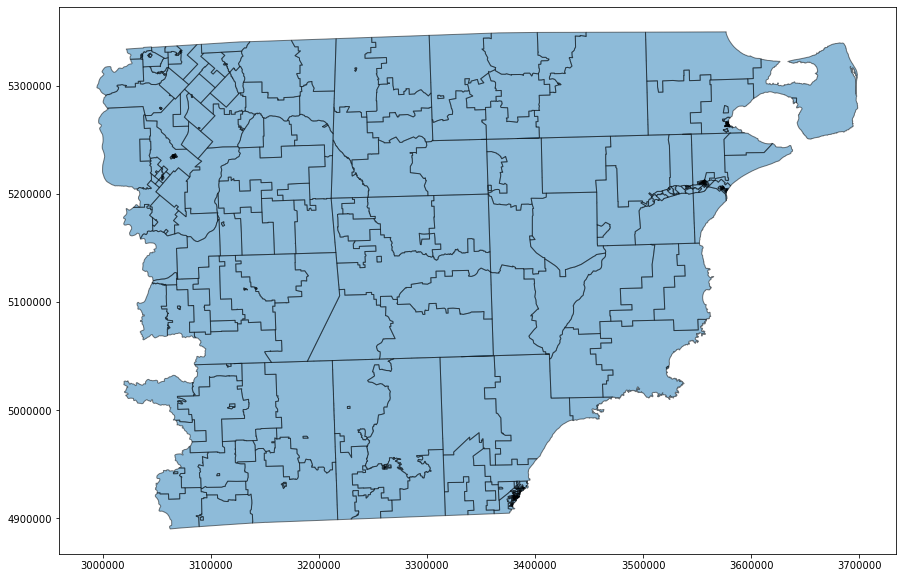

In [7]:
chubut.plot(
    figsize=figsize,
    alpha=0.5,
    color='#1f78b4',
    edgecolor='#000000'
)

# Geojson

In [8]:
import contextily as ctx
import matplotlib.pyplot as plt

In [9]:
argentina = gpd.read_file('./from-qgis/argentina-radios-censales.geojson')

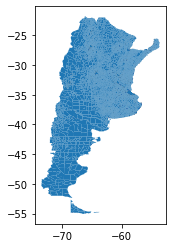

In [10]:
argentina.plot()

In [11]:
chubut = argentina[ argentina.link.str[:2] == '26']
chubut.head()

,hogares,link,mujer,toponimo_i,totalpobl,varon,viv_part_h,viviendasp,geometry
25176,29.0,260070101,16.0,335382.0,75.0,59.0,18.0,29.0,(POLYGON ((-65.97359910624587 -42.003689685430...
25177,42.0,260070201,36.0,288448.0,127.0,91.0,40.0,65.0,(POLYGON ((-64.09856434695331 -42.182932169726...
25178,156.0,260070202,257.0,321969.0,565.0,308.0,150.0,153.0,(POLYGON ((-64.3269005947449 -42.5395393719329...
25179,56.0,260070301,23.0,289844.0,106.0,83.0,23.0,36.0,(POLYGON ((-64.82428031856614 -42.386544930710...
25180,11.0,260070302,1.0,289845.0,15.0,14.0,11.0,21.0,(POLYGON ((-65.23863665983136 -42.399799732601...


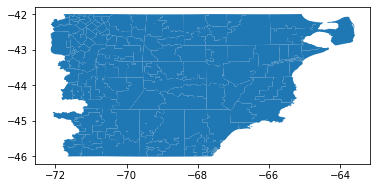

In [12]:
chubut.plot()

In [13]:
argentina.crs

{'init': 'epsg:4326'}

In [14]:
chubut.crs

{'init': 'epsg:4326'}

In [15]:
chubut_proj = chubut.to_crs(epsg=3857)

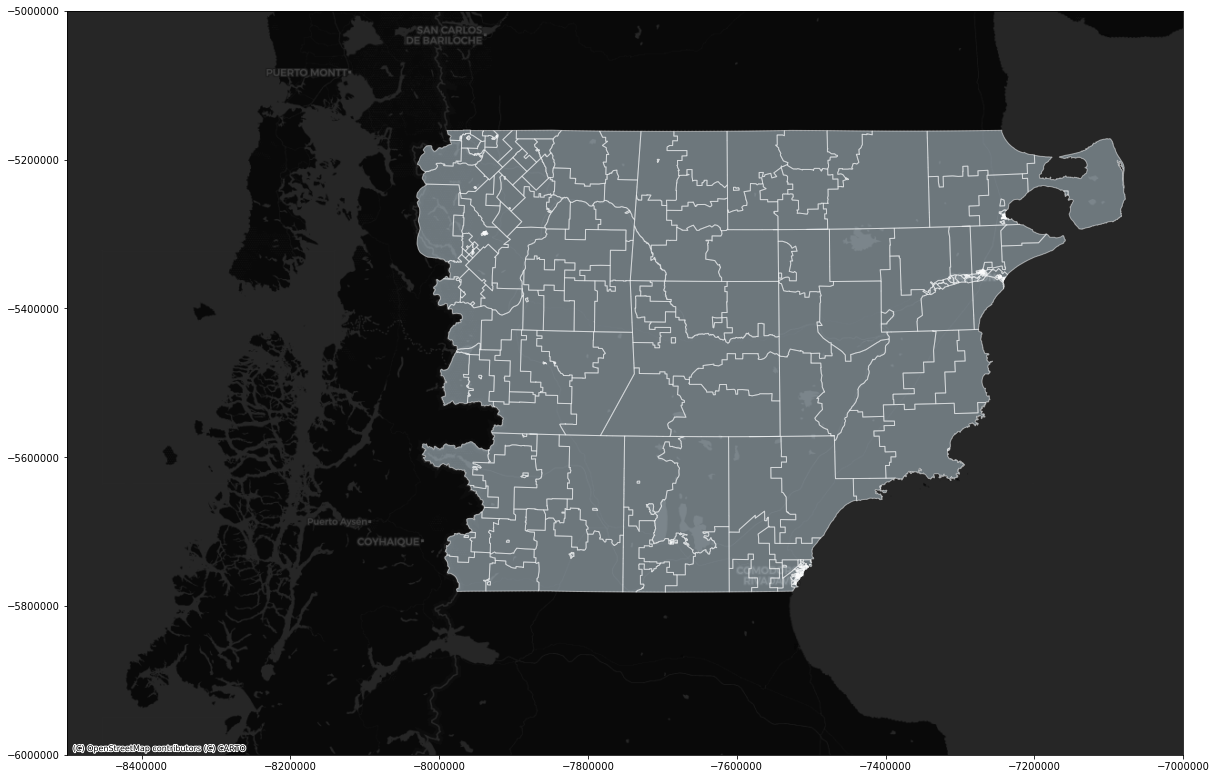

In [16]:
figsize = (20, 20)
fig, ax = plt.subplots(1, figsize=figsize)

chubut_proj.plot(
    alpha=0.5,
    color='#d1e5f0',
    edgecolor='#ffffff',
    ax=ax
)

ax.set_ylim((-6_000_000, -5_000_000))
ax.set_xlim((-8_500_000, -7_000_000))

ctx.add_basemap(ax,
                source=ctx.providers.CartoDB.DarkMatter)